In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import func
import seaborn as sns
import plots
import ipywidgets as widgets
from IPython.display import display

from func import ThreeD1, RMSE
from sklearn.metrics import accuracy_score
from statistics import mode
from sklearn.metrics import r2_score
from matplotlib.pyplot import figure
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

#from sklearn.model_selection import cross_val_score
pd.set_option("display.max_rows", 100, "display.max_columns", 100) 
np.set_printoptions(precision=2)


In [47]:
#df = pd.read_excel('cec_clay_susc.xlsx')[:56]
df = pd.read_excel('cec_clay_susc.xlsx')[:173]

df.describe()

,NUMBER,Duration,Depth,Klf_IP,Klf_QP,Ph_F1,Mass,#_y,Rg_F3,Khf_IP,Khf_QP,Ph_F3,Xlf_IP,Xhf_IP,Kfd_abs,Kfd,Xfd_abs,SiO2,SiO2 Error,MgO,MgO Error,Al2O3,Al2O3 Error,Mo,Mo Error,Zr,Zr Error,Sr,Sr Error,U,U Error,Rb,Rb Error,Th,Th Error,Pb,Pb Error,Au,Au Error,Se,Se Error,As,As Error,Hg,Hg Error,Zn,Zn Error,W,W Error,Cu,...,Cd Error,Ag,Ag Error,Pd,Pd Error,Bal,Bal Error,Nb,Nb Error,Bi,Bi Error,Re,Re Error,Ta,Ta Error,Hf,Hf Error,Al,Al Error,P,P Error,Si,Si Error,Cl,Cl Error,Mg,Mg Error,Sc,Sc Error,Cs,Cs Error,Te,Te Error,copeky,Archaeology,Bulk_density,copeky_depth,Carbone,Humus,pH_eau,CEC,Clay,Silt_fine,Silt_coarse,Silt,Sand_finr,Sand_coarse,Sand,Battance,CaCO
count,56.000000,56.000000,56.000000,173.000000,56.000000,56.000000,173.000000,56.000000,56.000000,173.000000,5.600000e+01,56.000000,1.730000e+02,1.730000e+02,1.730000e+02,173.000000,1.730000e+02,5.600000e+01,56.0,56.000000,56.0,56.000000,56.0,56.000000,56.000000,56.000000,56.000000,56.000000,56.00000,56.0,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.0,56.000000,56.0,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.0,56.000000,56.000000,...,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.0,56.0,56.0,56.0,56.0,56.0,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.00000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.0,56.000000,56.000000,173.000000,150.000000,56.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,65.000000
mean,128.500000,361.190357,84.607143,0.002966,0.000008,1.780714,10.413699,443.767857,3.035714,0.002644,5.588430e-07,1.749464,3.851155e-04,3.426173e-04,3.216557e-04,10.023602,4.249826e-05,8.147736e+05,0.0,3376.150357,0.0,104966.773571,0.0,5.670000,1.382143,336.833571,2.826607,87.617857,1.50750,0.0,2.999107,52.193750,1.420357,4.658571,1.296607,14.559643,2.105179,0.0,3.128036,0.0,1.689643,7.546607,2.072143,0.079464,4.018214,34.129643,3.471429,0.0,16.186429,9.710179,...,6.281964,0.738214,3.623214,0.646429,5.319286,506493.865714,1098.384464,7.329107,1.080357,3.212679,1.823750,0.0,1.5,0.0,1.5,0.0,1.5,55537.975536,1153.834286,230.206786,217.406964,380735.293571,1048.967857,5.42250,18.371250,1782.683929,1327.247143,6.855536,14.501250,0.796964,8.866429,0.0,19.163750,21.017857,0.242775,1.381900,84.357143,14.939364,2.978624,6.768439,10.065887,25.837597,11.050205,12.233698,23.283903,26.485640,24.392860,50.878500,0.576571,6.087692
std,129.429517,0.740427,60.721923,0.004042,0.000008,6.280166,3.703399,205.886022,0.187256,0.003618,1.932940e-06,3.690164,5.816412e-04,5.202483e-04,4.393032e-04,6.084587,6.305194e-05,1.395492e+05,0.0,2442.210344,0.0,37035.560062,0.0,2.773215,0.127089,155.551836,0.701866,55.872667,0.49634,0.0,0.540708,24.564462,0.355374,2.843824,0.144829,9.187658,0.338639,0.0,0.227104,0.0,0.131508,6.452734,0.359043,0.594656,0.350335,36.843258,0.763653,0.0,1.292301,9.846063,...,0.884304,1.539733,0.982307,1.894977,1.595178,27814.679966,74.493896,4.388561,0.185295,3.179280,0.326438,0.0,0.0,0.0,0.0,0.0,0.0,19595.534544,241.890321,468.180725,309.021511,65209.886639,56.098186,31.26507,2.523047,1683.146872,509.753206,14.302167,10.719625,3.467316,0.881541,0.0,1.076521,18.076093,0.430005,0.207847,60.796659,9.855823,1.978622,0.989544,6.634248,14.703730,6.588059,11.823587,16.553541,15.432102,17.038174,22.477296,0.762206,12.087746
min,1.000000,360.010000,4.000000,0.000003,-0.000002,-37.920000,5.830000,65.000000,3.000000,0.000001,-6.072000e-06,-0.790000,1.608132e-07,8.064890e-08,2.030000e-07,1.869159,1.196229e-08,4.877352e+05,0.0,0.000000,0.0,30473.500000,0.0,0.000000,1.090000,43.120000,1.190000,11.110000,0.69000,0.0,1.940000,9.580000,0.740000,0.000000,0.940000,2.330000,1.530000,0.0,2.740000,0.0,1.450000,0.000000,1.450000,0.000000,2.760000,0.000000,2.480000,0.0,14.000000,0.000000,...,3.250000,0.000000,1.740000,0.000000,1.800000,465954.7200

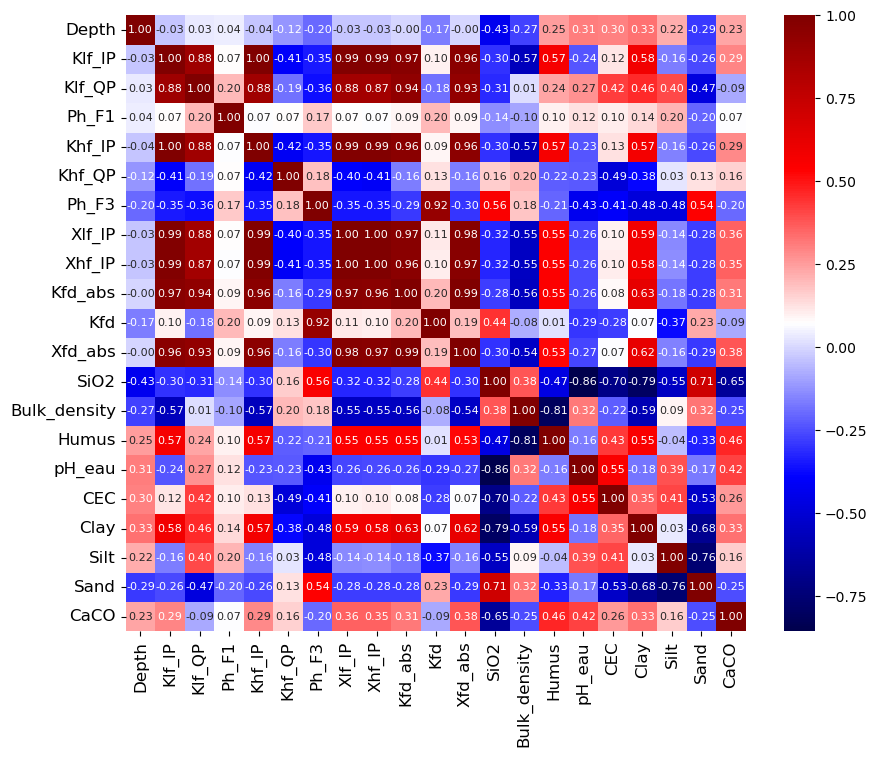

In [48]:
df_f = df[['Depth', 'Klf_IP', 'Klf_QP', 'Ph_F1', 'Khf_IP', 'Khf_QP', 'Ph_F3', 'Xlf_IP', 'Xhf_IP', 'Kfd_abs', 'Kfd', 'Xfd_abs', 'SiO2', 'Bulk_density', 
           'Humus', 'pH_eau', 'CEC', 'Clay', 'Silt', 'Sand', 'CaCO']]

# Setting the figure size
plt.figure(figsize=(10, 8))

# Plotting correlation heatmap with annotations
dataplot = sns.heatmap(df_f.corr(), cmap="seismic", annot=True, fmt=".2f", annot_kws={"size": 8})

dataplot.tick_params(axis='both', which='major', labelsize=12)

# Rotating y-axis labels for better visualization
dataplot.set_yticklabels(dataplot.get_yticklabels(), rotation=0)

# Setting the label size for x and y axes
dataplot.set_xlabel(dataplot.get_xlabel(), fontsize=14)
dataplot.set_ylabel(dataplot.get_ylabel(), fontsize=14)

plt.show()

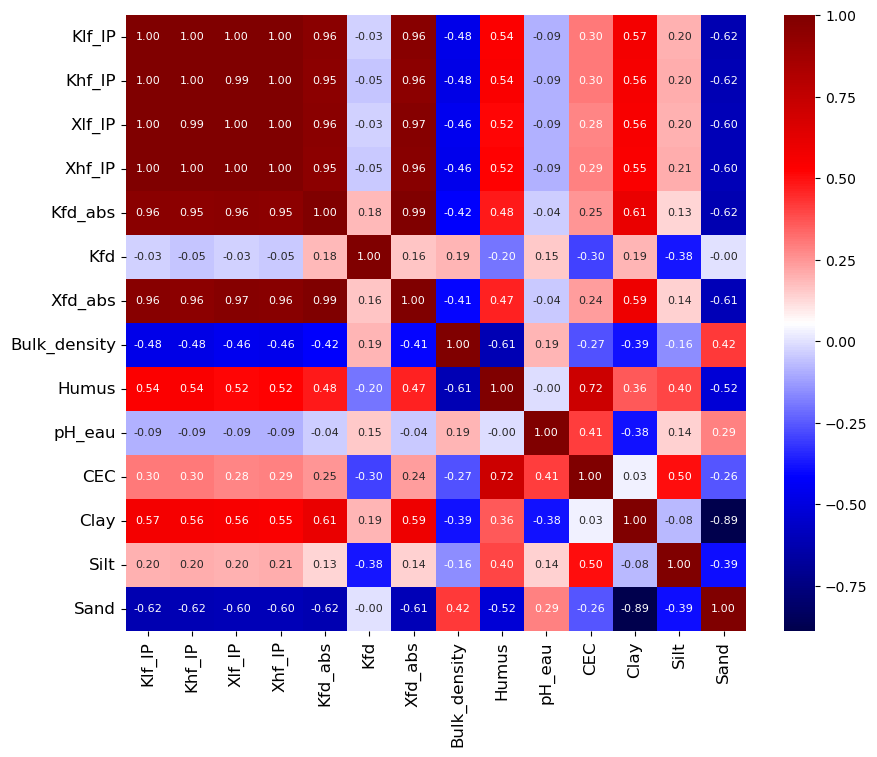

In [49]:
df_f = df[['Klf_IP', 'Khf_IP', 'Xlf_IP', 'Xhf_IP', 'Kfd_abs', 'Kfd', 'Xfd_abs', 'Bulk_density', 
           'Humus', 'pH_eau', 'CEC', 'Clay', 'Silt', 'Sand']][69:]

# Setting the figure size
plt.figure(figsize=(10, 8))

# Plotting correlation heatmap with annotations
dataplot = sns.heatmap(df_f.corr(), cmap="seismic", annot=True, fmt=".2f", annot_kws={"size": 8})

dataplot.tick_params(axis='both', which='major', labelsize=12)

# Rotating y-axis labels for better visualization
dataplot.set_yticklabels(dataplot.get_yticklabels(), rotation=0)

# Setting the label size for x and y axes
dataplot.set_xlabel(dataplot.get_xlabel(), fontsize=14)
dataplot.set_ylabel(dataplot.get_ylabel(), fontsize=14)

plt.show()

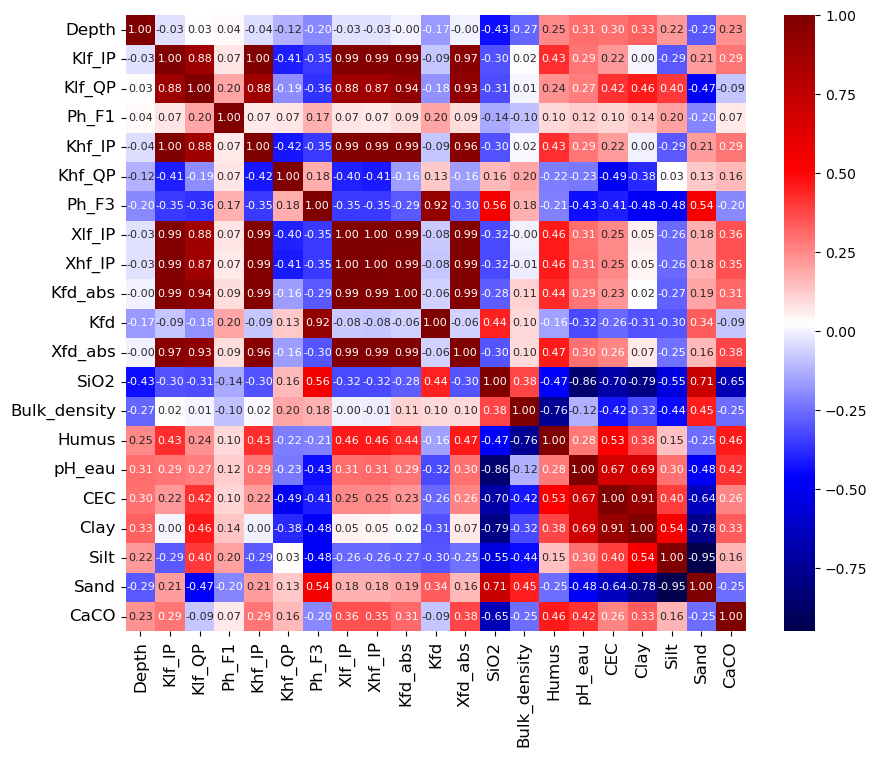

In [50]:
df_f = df[['Depth', 'Klf_IP', 'Klf_QP', 'Ph_F1', 'Khf_IP', 'Khf_QP', 'Ph_F3', 'Xlf_IP', 'Xhf_IP', 'Kfd_abs', 'Kfd', 'Xfd_abs', 'SiO2', 'Bulk_density', 
           'Humus', 'pH_eau', 'CEC', 'Clay', 'Silt', 'Sand', 'CaCO']][:69]

# Setting the figure size
plt.figure(figsize=(10, 8))

# Plotting correlation heatmap with annotations
dataplot = sns.heatmap(df_f.corr(), cmap="seismic", annot=True, fmt=".2f", annot_kws={"size": 8})

dataplot.tick_params(axis='both', which='major', labelsize=12)

# Rotating y-axis labels for better visualization
dataplot.set_yticklabels(dataplot.get_yticklabels(), rotation=0)

# Setting the label size for x and y axes
dataplot.set_xlabel(dataplot.get_xlabel(), fontsize=14)
dataplot.set_ylabel(dataplot.get_ylabel(), fontsize=14)

plt.show()

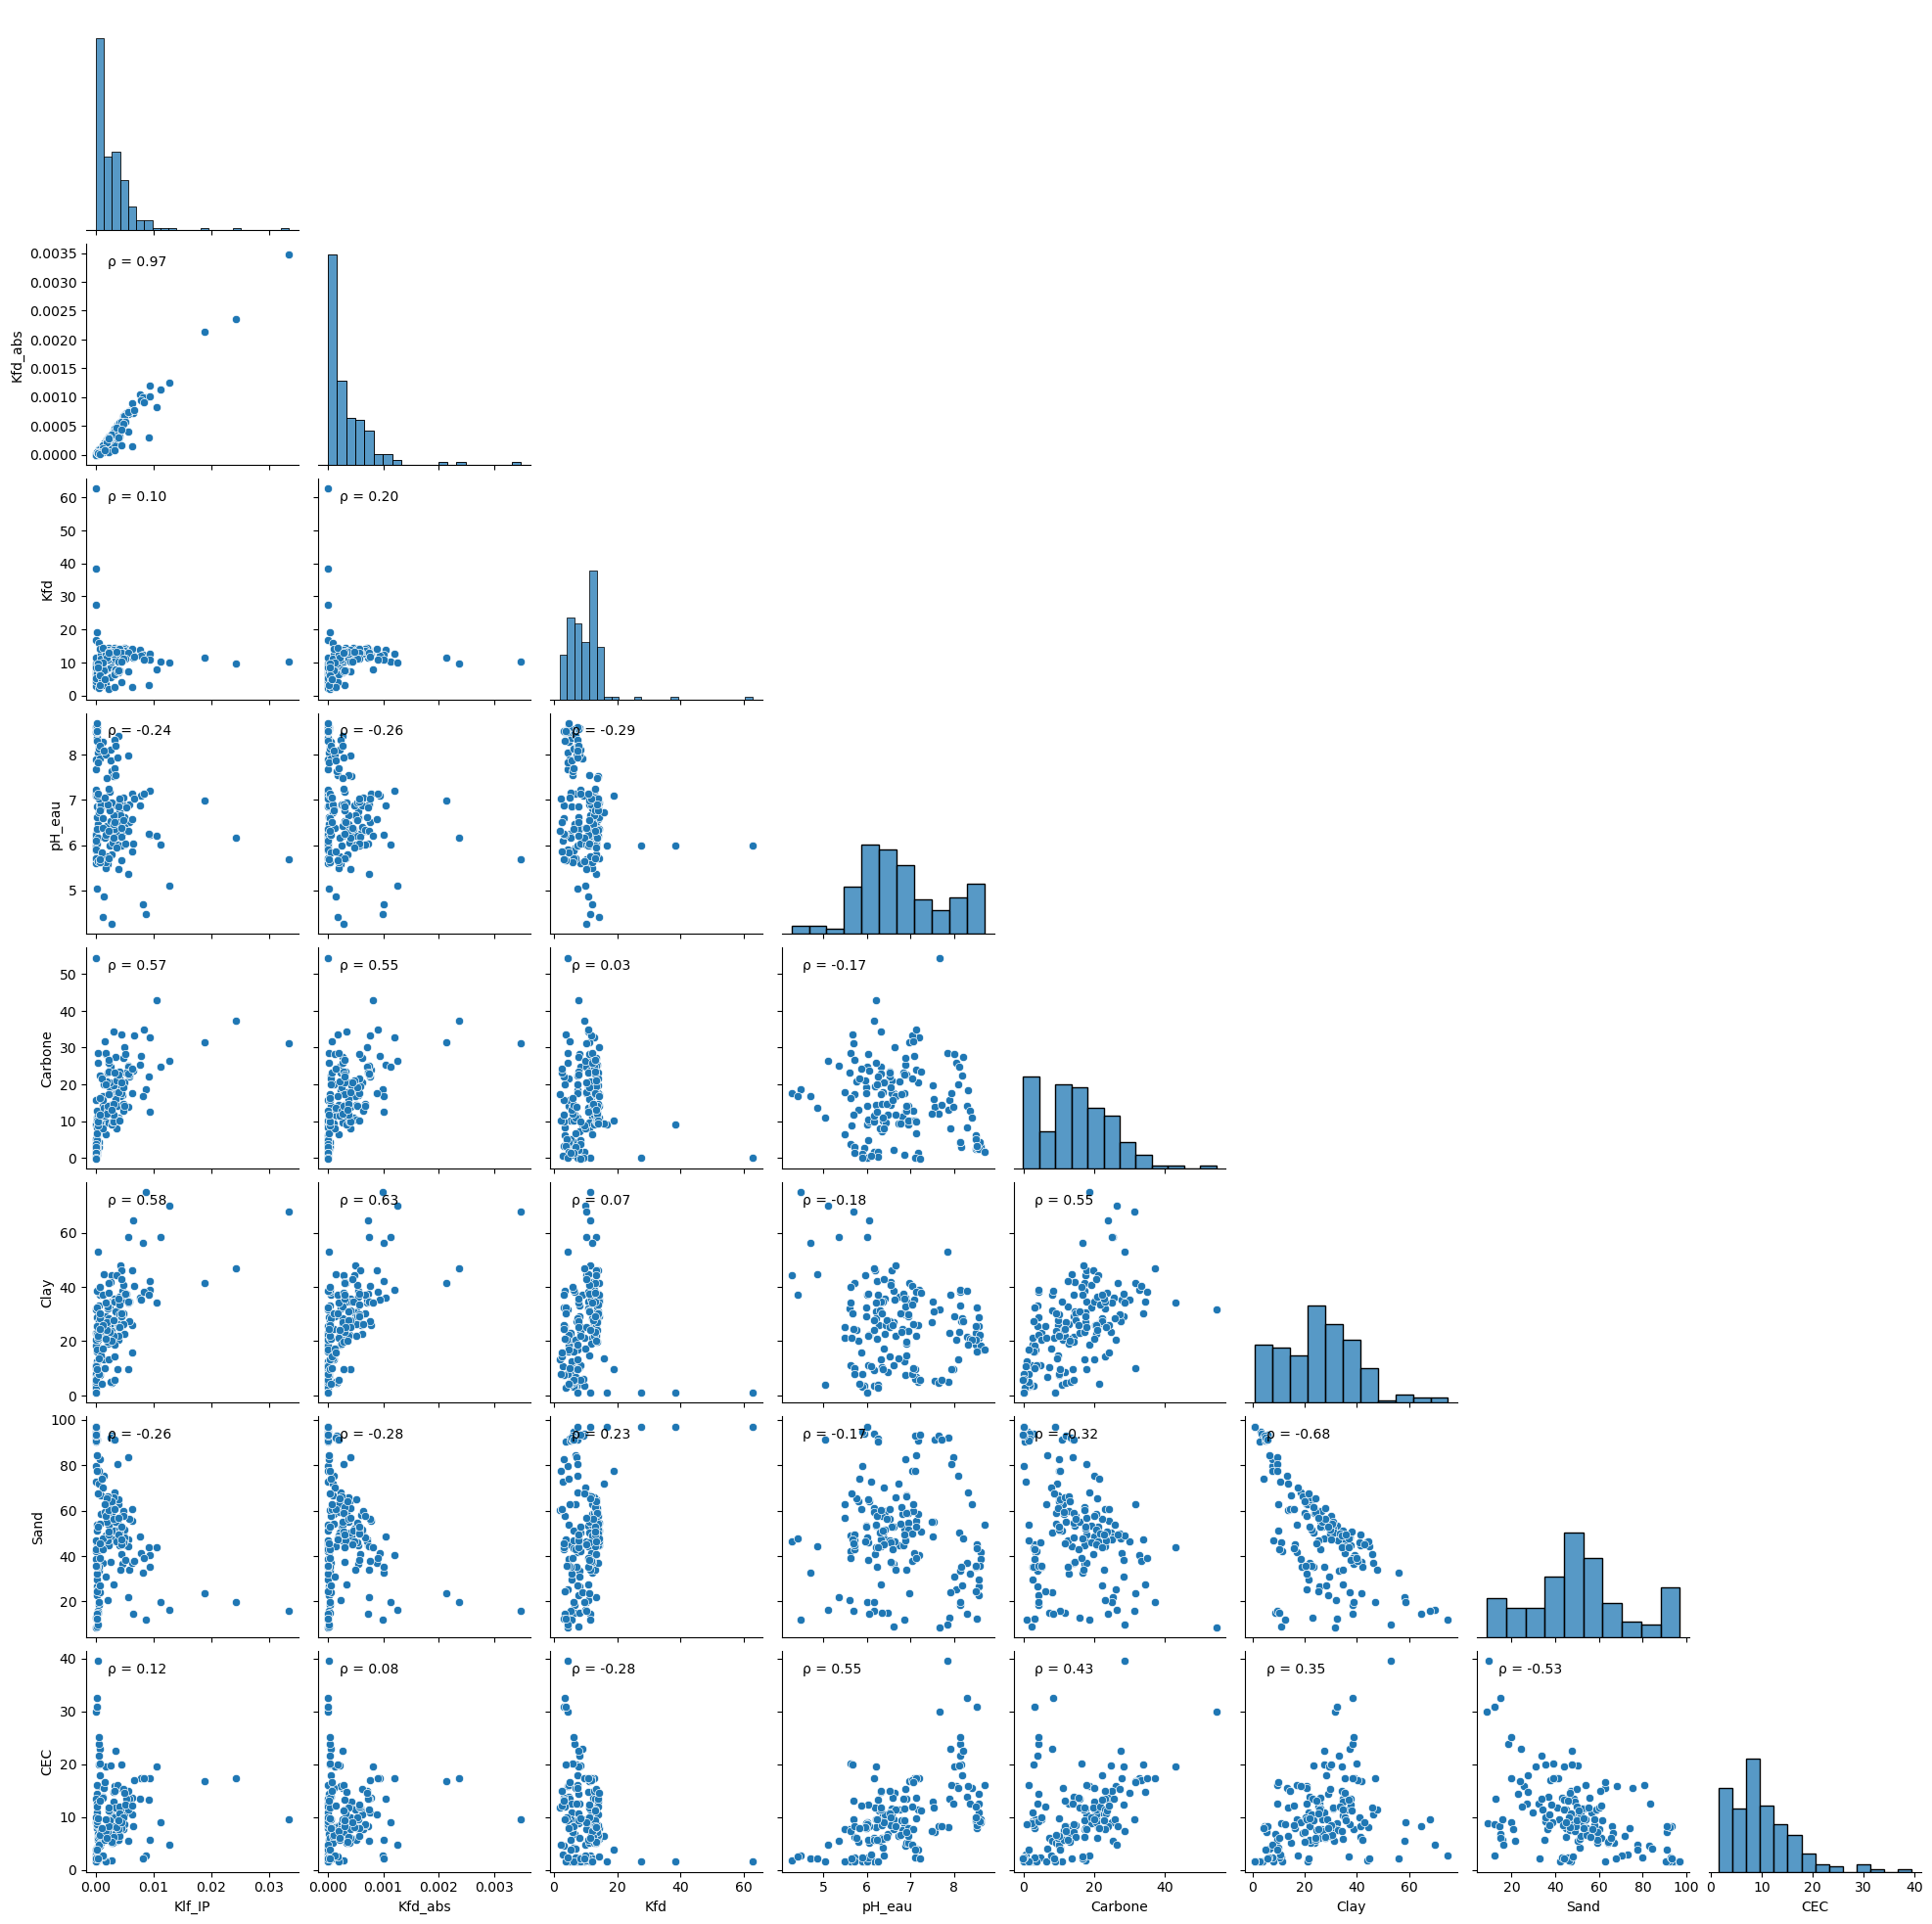

In [51]:
g = sns.pairplot(df.loc[:,['Klf_IP', 'Kfd_abs', 'Kfd', 'pH_eau', 'Carbone', 'Clay', 'Sand', 'CEC']], 
                  diag_kws=dict(fill=True), corner=True)

g.map_lower(func.corrfunc)
plt.show()

In [52]:
mapping = {
    "AN": ("black", "o"),
    "P": ("cornflowerblue", "o"),
    "S": ("orange", "o"),
    "Ea": ("blue", "o"),
    "Aa": ("navy", "o"),
    "HE": ("indianred", "o"),
    "L": ("bisque", "^"),
    "D": ("firebrick", "^"),
    "V": ("sandybrown", "^"),
    "HOEKE": ("teal", "^"),
    "EHBH": ("green", "^"),
}

# Function to plot data.
def plot_data(axis, x_col, y_col, include_label=False, aa=0.7, ss=60, lw=0):
    corr = round(np.corrcoef(x_col, y_col)[0][1], 2)
    for start_str, (color, marker) in mapping.items():
        mask = df['SAMPLE'].str.startswith(start_str)
        label = f"{start_str} Site" if include_label else None
        axis.text(x=0, y=np.max(y_col), s = f'Corr = {corr}' )
        axis.scatter(x_col[mask], y_col[mask], alpha=aa, s=ss, linewidth=lw, c=color, marker=marker, label=label)
        axis.set_ylim(0, np.max(y_col))

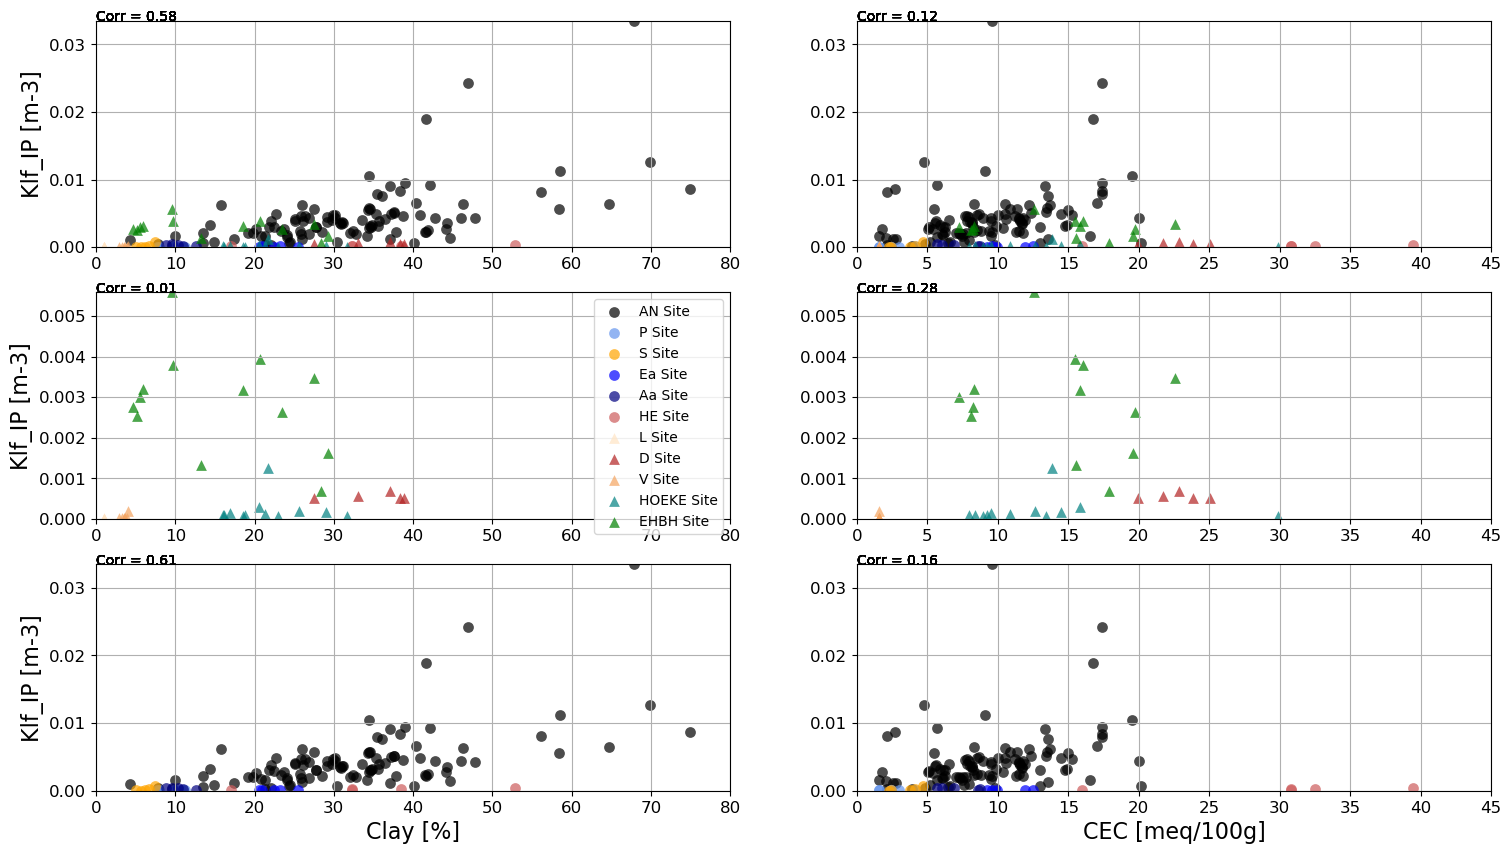

In [53]:
fig1, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(18, 10))

# Using the plot function instead of multiple individual plot calls.
plot_data(ax1, df['Clay'], df['Klf_IP'])
plot_data(ax2, df.CEC, df['Klf_IP'])
plot_data(ax3, df.Clay[df.Archaeology==1], df.Klf_IP[df.Archaeology==1], include_label=True)
plot_data(ax4, df.CEC[df.Archaeology==1], df.Klf_IP[df.Archaeology==1])
plot_data(ax5, df.Clay[df.Archaeology==0], df.Klf_IP[df.Archaeology==0])
plot_data(ax6, df.CEC[df.Archaeology==0], df.Klf_IP[df.Archaeology==0])

# Example to show labels
ax3.legend(loc='upper right', fontsize = 10)

plots.plot1(ax1, ax2, ax3, ax4, ax5, ax6)
plt.show()

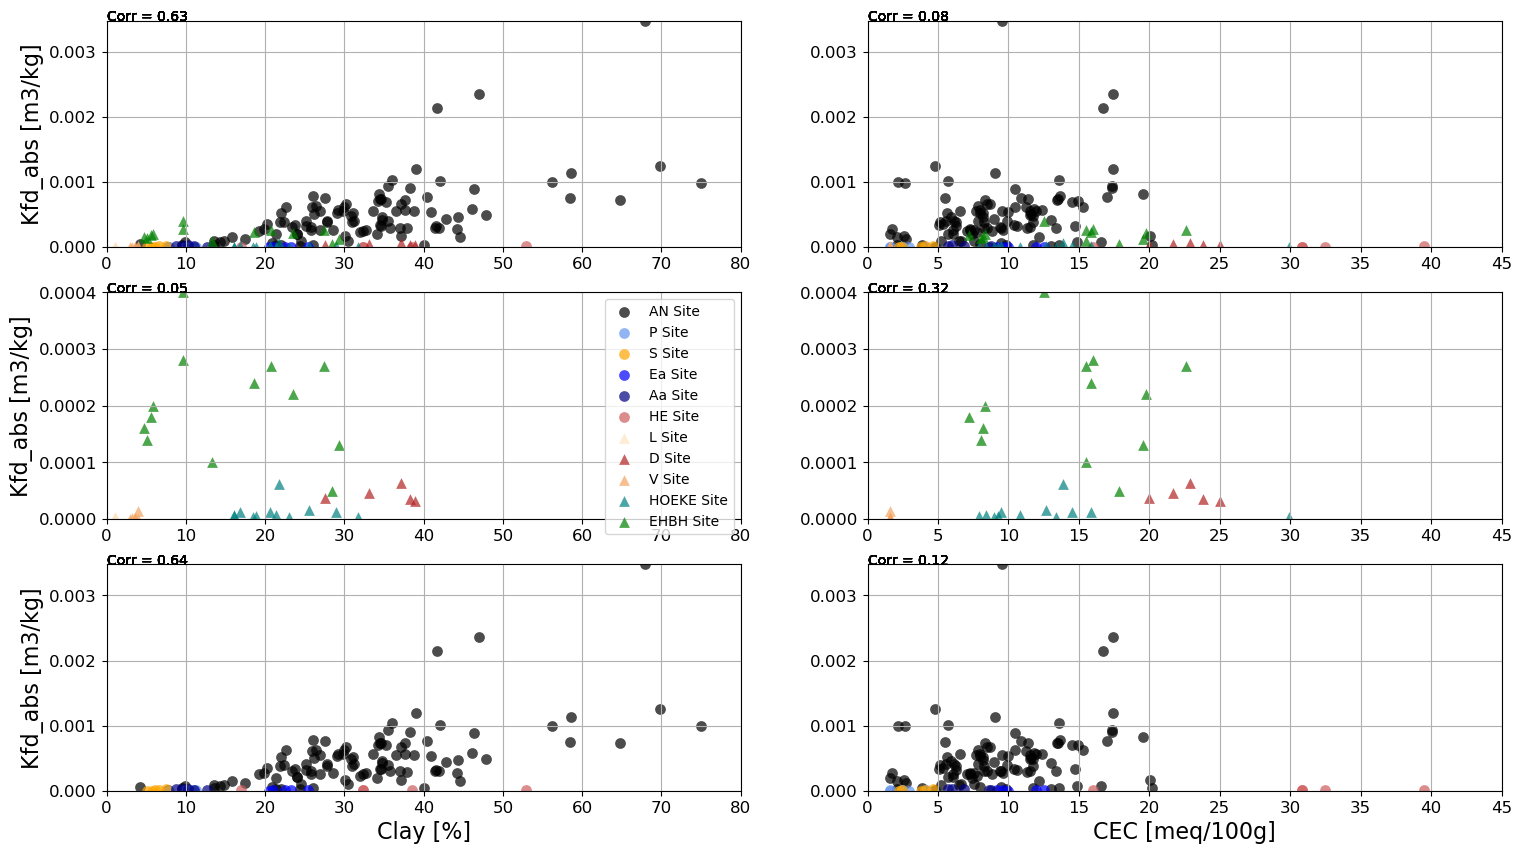

In [54]:
fig2, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(18, 10))

# Using the plot function instead of multiple individual plot calls.
plot_data(ax1, df['Clay'], df['Kfd_abs'])
plot_data(ax2, df.CEC, df['Kfd_abs'])
plot_data(ax3, df.Clay[df.Archaeology==1], df.Kfd_abs[df.Archaeology==1], include_label=True)
plot_data(ax4, df.CEC[df.Archaeology==1], df.Kfd_abs[df.Archaeology==1])
plot_data(ax5, df.Clay[df.Archaeology==0], df.Kfd_abs[df.Archaeology==0])
plot_data(ax6, df.CEC[df.Archaeology==0], df.Kfd_abs[df.Archaeology==0])

# Example to show labels
ax3.legend(loc='upper right', fontsize = 10)

plots.plot2(ax1, ax2, ax3, ax4, ax5, ax6)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


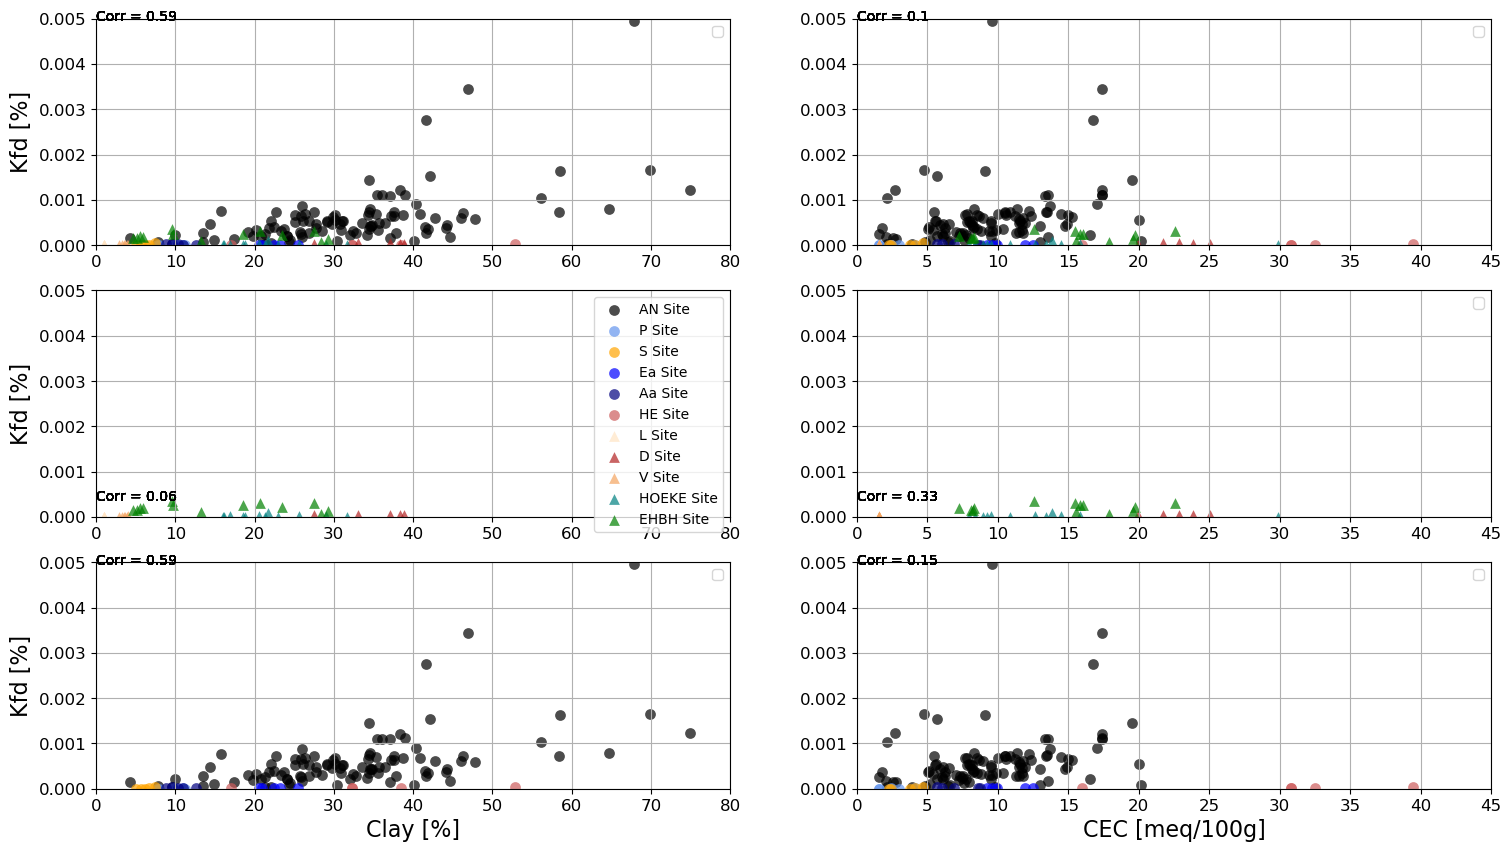

In [55]:
fig3, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(18, 10))

# Using the plot function instead of multiple individual plot calls.
plot_data(ax1, df['Clay'], df['Xlf_IP'])
plot_data(ax2, df.CEC, df['Xlf_IP'])
plot_data(ax3, df.Clay[df.Archaeology==1], df.Xlf_IP[df.Archaeology==1], include_label=True)
plot_data(ax4, df.CEC[df.Archaeology==1], df.Xlf_IP[df.Archaeology==1])
plot_data(ax5, df.Clay[df.Archaeology==0], df.Xlf_IP[df.Archaeology==0])
plot_data(ax6, df.CEC[df.Archaeology==0], df.Xlf_IP[df.Archaeology==0])

# Example to show labels
ax3.legend(loc='upper right', fontsize = 10)

plots.plot3(ax1, ax2, ax3, ax4, ax5, ax6)
plt.show()

## Modelling Klf(Clay, CEC)


In [56]:
results_r2 = pd.DataFrame(columns=['Clay_Klf_IP', 'Clay_Kfd'])
results_rmse = pd.DataFrame(columns=['Clay_Klf_IP', 'Clay_Kfd'])

In [57]:
def plot_3d(DF, x, y, z, X, Y, Z, elev=30, azim=30):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(DF[x], DF[y], DF[z], c="navy", s=15)
    ax.plot_surface(X, Y, Z, alpha=0.5)
    ax.view_init(elev=elev, azim=azim)
    plt.show()

def bars_plot(feature_sets, test_errors_summary, train_errors_summary):
    fig, ax = plt.subplots()
    width = 0.35  # the width of the bars

    x = np.arange(len(feature_sets))
    rects1 = ax.bar(x - width/2, test_errors_summary, width, color = 'red', label='Test')
    rects2 = ax.bar(x + width/2, train_errors_summary, width, color = 'blue', label='Train')

    ax.axhline(0, color='grey', linewidth=0.8)
    ax.set_ylabel('Scores')
    ax.set_xticks(range(len(test_errors_summary)), feature_sets, rotation = 15)
    ax.set_ylim(0, 1)
    ax.legend()
    fig.tight_layout()

    plt.show()
    plt.savefig("results_cec", dpi=200)

In [58]:
df_fil = df.copy()[:69]
s_array_1 = df_fil[['Clay']].to_numpy()
s_array_2 = df_fil[['Clay', 'Klf_IP']].to_numpy()
s_array_3 = df_fil[['Clay', 'Sand']].to_numpy()
s_array_4 = df_fil[['Clay', 'Khf_IP']].to_numpy()
s_array_5 = df_fil[['Clay', 'Kfd']].to_numpy()

reg1 = LinearRegression().fit(s_array_1, df_fil.CEC)
print('Array 1')
print( np.sqrt(np.mean((reg1.predict(s_array_1) - df_fil.CEC)**2)))
print(reg1.score(s_array_1, df_fil.CEC))
print("coefficients of equation of plane, (a1, a2): ", reg1.coef_)
print("value of intercept, c:", reg1.intercept_)

reg2 = LinearRegression().fit(s_array_2, df_fil.CEC)
print('Array 2')
print( np.sqrt(np.mean((reg2.predict(s_array_2) - df_fil.CEC)**2)))
print(reg2.score(s_array_2, df_fil.CEC))
print("coefficients of equation of plane, (a1, a2): ", reg2.coef_)
print("value of intercept, c:", reg2.intercept_)

reg3 = LinearRegression().fit(s_array_3, df_fil.CEC)
print('Array 3')
print( np.sqrt(np.mean((reg3.predict(s_array_3) - df_fil.CEC)**2)))
print(reg3.score(s_array_3, df_fil.CEC))
print("coefficients of equation of plane, (a1, a2): ", reg3.coef_)
print("value of intercept, c:", reg3.intercept_)

reg4 = LinearRegression().fit(s_array_4, df_fil.CEC)
print('Array 4')
print( np.sqrt(np.mean((reg4.predict(s_array_4) - df_fil.CEC)**2)))
print(reg4.score(s_array_4, df_fil.CEC))
print("coefficients of equation of plane, (a1, a2): ", reg4.coef_)
print("value of intercept, c:", reg4.intercept_)

reg5 = LinearRegression().fit(s_array_5, df_fil.CEC)
print('Array 5')
print( np.sqrt(np.mean((reg5.predict(s_array_5) - df_fil.CEC)**2)))
print(reg5.score(s_array_5, df_fil.CEC))
print("coefficients of equation of plane, (a1, a2): ", reg5.coef_)
print("value of intercept, c:", reg5.intercept_)

#######################################################################################

# Create a meshgrid for Clay and Khf_IP
a0 = np.linspace(df_fil.Clay.min(), df_fil.Clay.max(), 50)
b0 = np.linspace(df_fil.Khf_IP.min(), df_fil.Khf_IP.max(), 50)
A0, B0 = np.meshgrid(a0, b0)

# Calculate the Z values for the plane using the meshgrid
Z0 = reg4.coef_[0]*A0 + reg4.coef_[1]*B0 + reg4.intercept_

def interactive_plot(elev=30, azim=30):
    return plot_3d(df_fil, 'Clay', 'Khf_IP', 'CEC', A0, B0, Z0, elev, azim)

widgets.interactive(interactive_plot, elev=(0, 90, 2), azim=(0, 360, 2))
# Here we implemented linear functions to predict soil CEC based on different features. The model development fits the entire dataset.
# The Dataset was filtered to consider non-tropical soils
# With these trhee conditions, adding soil susceptibility to clay is the optimal for CEC prediction.
# Further analysis follows the same problem for non-linear modelling with split of train and test datasets

Array 1
3.7823879857794256
0.8244485921101703
coefficients of equation of plane, (a1, a2):  [0.7]
value of intercept, c: -0.31636207523237303
Array 2
3.2572091979248627
0.8698142435203
coefficients of equation of plane, (a1, a2):  [6.99e-01 1.60e+03]
value of intercept, c: -1.4246657060678771
Array 3
3.633648058866638
0.8379840066676021
coefficients of equation of plane, (a1, a2):  [0.81 0.05]
value of intercept, c: -4.991355614013395
Array 4
3.2554627567029413
0.8699538113556554
coefficients of equation of plane, (a1, a2):  [6.99e-01 1.73e+03]
value of intercept, c: -1.4332269349883084
Array 5
3.7769400456557785
0.8249539367731193
coefficients of equation of plane, (a1, a2):  [0.71 0.03]
value of intercept, c: -0.6108406630594949


interactive(children=(IntSlider(value=30, description='elev', max=90, step=2), IntSlider(value=30, description…

In [59]:
df_fil = df.copy()[:69]
s_array_1 = df_fil[['Clay']].to_numpy()
s_array_2 = df_fil[['Clay', 'CEC']].to_numpy()
s_array_3 = df_fil[['Clay', 'Sand']].to_numpy()
s_array_4 = df_fil[['Clay', 'pH_eau']].to_numpy()
s_array_5 = df_fil[['Clay', 'Humus']].to_numpy()

reg1 = LinearRegression().fit(s_array_1, df_fil.Klf_IP)
print('Array 1')
print( np.sqrt(np.mean((reg1.predict(s_array_1) - df_fil.Klf_IP)**2)))
print(reg1.score(s_array_1, df_fil.Klf_IP))
print("coefficients of equation of plane, (a1, a2): ", reg1.coef_)
print("value of intercept, c:", reg1.intercept_)

reg2 = LinearRegression().fit(s_array_2, df_fil.Klf_IP)
print('Array 2')
print( np.sqrt(np.mean((reg2.predict(s_array_2) - df_fil.Klf_IP)**2)))
print(reg2.score(s_array_2, df_fil.Klf_IP))
print("coefficients of equation of plane, (a1, a2): ", reg2.coef_)
print("value of intercept, c:", reg2.intercept_)

reg3 = LinearRegression().fit(s_array_3, df_fil.Klf_IP)
print('Array 3')
print( np.sqrt(np.mean((reg3.predict(s_array_3) - df_fil.Klf_IP)**2)))
print(reg3.score(s_array_3, df_fil.Klf_IP))
print("coefficients of equation of plane, (a1, a2): ", reg3.coef_)
print("value of intercept, c:", reg3.intercept_)

reg4 = LinearRegression().fit(s_array_4, df_fil.Klf_IP)
print('Array 4')
print( np.sqrt(np.mean((reg4.predict(s_array_4) - df_fil.Klf_IP)**2)))
print(reg4.score(s_array_4, df_fil.Klf_IP))
print("coefficients of equation of plane, (a1, a2): ", reg4.coef_)
print("value of intercept, c:", reg4.intercept_)

reg5 = LinearRegression().fit(s_array_5, df_fil.Klf_IP)
print('Array 5')
print( np.sqrt(np.mean((reg5.predict(s_array_5) - df_fil.Klf_IP)**2)))
print(reg5.score(s_array_5, df_fil.Klf_IP))
print("coefficients of equation of plane, (a1, a2): ", reg5.coef_)
print("value of intercept, c:", reg5.intercept_)

#######################################################################################

# Create a meshgrid for Clay and Khf_IP
a1 = np.linspace(df_fil.Clay.min(), df_fil.Clay.max(), 50)
b1 = np.linspace(df_fil.CEC.min(), df_fil.CEC.max(), 50)
A1, B1 = np.meshgrid(a1, b1)

# Calculate the Z values for the plane using the meshgrid
Z1 = reg4.coef_[0]*A1 + reg4.coef_[1]*B1 + reg4.intercept_

def interactive_plot(elev=30, azim=30):
    return plot_3d(df_fil, 'Clay', 'CEC', 'Klf_IP', A1, B1, Z1, elev, azim)

widgets.interactive(interactive_plot, elev=(0, 90, 2), azim=(0, 360, 2))

Array 1
0.0012004338098850526
1.5764258183392776e-05
coefficients of equation of plane, (a1, a2):  [4.07e-07]
value of intercept, c: 0.0006919416646322846
Array 2
0.001033755411067869
0.25842973427178606
coefficients of equation of plane, (a1, a2):  [-0.  0.]
value of intercept, c: 0.0007429825238092062
Array 3
0.0011261724818780014
0.11991111038752356
coefficients of equation of plane, (a1, a2):  [4.47e-05 2.14e-05]
value of intercept, c: -0.0011582815338193348
Array 4
0.001101938258383382
0.15738101582264286
coefficients of equation of plane, (a1, a2):  [-3.80e-05  6.14e-04]
value of intercept, c: -0.003238611798834048
Array 5
0.0010657231829060358
0.21185605650391737
coefficients of equation of plane, (a1, a2):  [-1.88e-05  3.15e-04]
value of intercept, c: 0.00046976548866514245


interactive(children=(IntSlider(value=30, description='elev', max=90, step=2), IntSlider(value=30, description…

In [60]:
def stochastic_poly(df, feature_columns, Y, n=4, iters=1000, round_n=3):
    ypred_train_best, ypred_test_best, R2_train_t_best, R2_test_t_best, RMSE_train_t_best, RMSE_test_t_best = [], [], [], [], [], []
    X = df[feature_columns]

    for i in range(iters):
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=i)
        LinReg = LinearRegression()
        ypred_train_, ypred_test_, R2_train_t_, R2_test_t_, RMSE_train_t_, RMSE_test_t_ = [], [], [], [], [], []

        for k in range(n):
            poly = PolynomialFeatures(degree=k)
            poly.fit(X_train)
            Xt_train = poly.transform(X_train)
            Xt_test = poly.transform(X_test)

            LinReg.fit(Xt_train, y_train)
            ypred_train = LinReg.predict(Xt_train)
            ypred_test = LinReg.predict(Xt_test)

            R2_train_t = r2_score(y_train, ypred_train)
            R2_test_t = r2_score(y_test, ypred_test)
            RMSE_train_t = RMSE(y_train, ypred_train)
            RMSE_test_t = RMSE(y_test, ypred_test)

            ypred_train_.append(ypred_train)
            ypred_test_.append(ypred_test)
            R2_train_t_.append(R2_train_t)
            R2_test_t_.append(R2_test_t)
            RMSE_train_t_.append(RMSE_train_t)
            RMSE_test_t_.append(RMSE_test_t)

        ypred_train_best.append(ypred_train_)
        ypred_test_best.append(ypred_test_)
        R2_train_t_best.append(R2_train_t_)
        R2_test_t_best.append(R2_test_t_)
        RMSE_train_t_best.append(RMSE_train_t_)
        RMSE_test_t_best.append(RMSE_test_t_)

    r2_test_n1 = [inner_list[0] for inner_list in R2_test_t_best]
    r2_test_n2 = [inner_list[1] for inner_list in R2_test_t_best]
    r2_test_n3 = [inner_list[2] for inner_list in R2_test_t_best]
    r2_test_n4 = [inner_list[3] for inner_list in R2_test_t_best]
    
    r2_means = [np.mean(r2_test_n1), np.mean(r2_test_n2), np.mean(r2_test_n3), np.mean(r2_test_n4)]
    best_n = r2_means.index(np.max(r2_means))
    return best_n, round(np.mean([inner_list[best_n] for inner_list in R2_test_t_best]), round_n), round(np.mean([inner_list[best_n] for inner_list in R2_train_t_best]), round_n), round(np.mean([inner_list[best_n] for inner_list in RMSE_test_t_best]), round_n), round(np.mean([inner_list[best_n] for inner_list in RMSE_train_t_best]), round_n)                                             

## CEC prediction for non tropical soils

best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set: 2 0.78 0.836 3.889 3.633 ['Clay']
best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set: 1 0.819 0.868 3.54 3.256 ['Clay', 'Humus']
best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set: 2 0.78 0.87 3.937 3.233 ['Clay', 'pH_eau']
best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set: 1 0.834 0.872 3.421 3.208 ['Clay', 'Khf_IP']
best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set: 1 0.827 0.883 3.464 3.072 ['Clay', 'pH_eau', 'Sand', 'Humus']


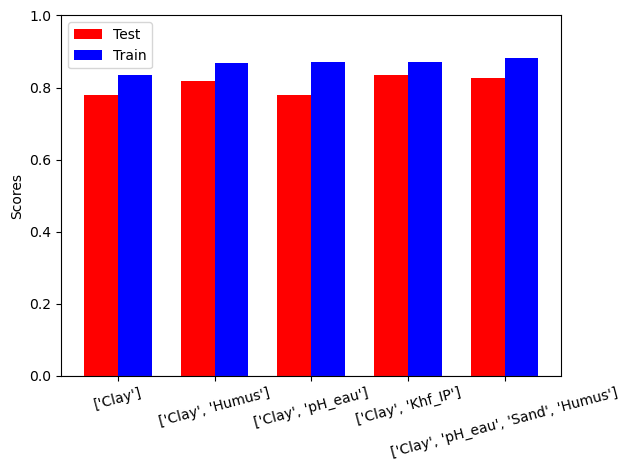

R2 0.8699538113556554
RMSE 3.2554627567029413
LinReg_CEC_NTS [0.00e+00 6.99e-01 1.73e+03]


<Figure size 640x480 with 0 Axes>

interactive(children=(IntSlider(value=30, description='elev', max=90, step=2), IntSlider(value=30, description…

In [61]:
feature_sets = [
    ['Clay'],
    ['Clay', 'Humus'],
    ['Clay', 'pH_eau'],
    ['Clay', 'Khf_IP'],
  #  ['Clay', 'Klf_QP'],
    ['Clay', 'pH_eau', 'Sand', 'Humus']
]

target = df_fil['CEC']

test_errors_summary = []
train_errors_summary = []

for feature_set in feature_sets:
    x = df_fil[feature_set].values
    
    best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol = stochastic_poly(df_fil, feature_set, target, iters=100)
    print('best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set:', best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set)
    test_errors_summary.append(R2_test_pol)
    train_errors_summary.append(R2_train_pol)

bars_plot(feature_sets, test_errors_summary, train_errors_summary)

################## Puesta en marcha y plot #################

LinReg_CEC_NTS = LinearRegression()
x = df_fil[['Clay', 'Khf_IP']]
poly = PolynomialFeatures(degree=1)
poly.fit(x)
xt = poly.transform(x)
LinReg_CEC_NTS.fit(xt, target)
ypred = LinReg_CEC_NTS.predict(xt)
R2 = r2_score(target, ypred)
RMSE_ = RMSE(target, ypred)
print('R2', R2)
print('RMSE', RMSE_)

# Create a meshgrid for Clay and Khf_IP
a2 = np.linspace(df_fil.Clay.min(), df_fil.Clay.max(), 50)
b2 = np.linspace(df_fil.Khf_IP.min(), df_fil.Khf_IP.max(), 50)
A2, B2 = np.meshgrid(a2, b2)

print('LinReg_CEC_NTS', LinReg_CEC_NTS.coef_)
# Calculate the Z values for the plane using the meshgrid
Z2 = LinReg_CEC_NTS.coef_[0]*LinReg_CEC_NTS.intercept_ + LinReg_CEC_NTS.coef_[1]*A2 + LinReg_CEC_NTS.coef_[2]*B2 + LinReg_CEC_NTS.intercept_

def interactive_plot(elev=30, azim=30):
    return plot_3d(df_fil, 'Clay', 'Khf_IP', 'CEC', A2, B2, Z2, elev, azim)

widgets.interactive(interactive_plot, elev=(0, 90, 2), azim=(0, 360, 2))
# De aca concluyo que el grado del polinomio puede mejorar el fitting, y que Khf_IP es tan efectivo como Humus para predecir CEC. Esperemos aun las muestras de Polonia.

## CEC prediction for tropical and non-tropical soils

best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set: 2 0.225 0.26 5.752 5.655 ['Clay']
best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set: 2 0.277 0.457 5.526 4.848 ['Clay', 'Humus']
best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set: 3 0.576 0.681 4.164 3.697 ['Clay', 'pH_eau']
best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set: 1 0.052 0.135 6.335 6.11 ['Clay', 'Khf_IP']
best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set: 2 0.768 0.849 3.11 2.549 ['Clay', 'pH_eau', 'Sand', 'Humus']


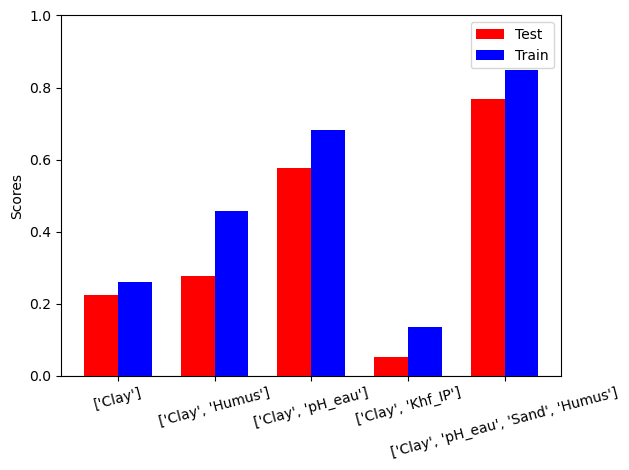

R2 0.8419221391014993
RMSE 2.6300766638591515


<Figure size 640x480 with 0 Axes>

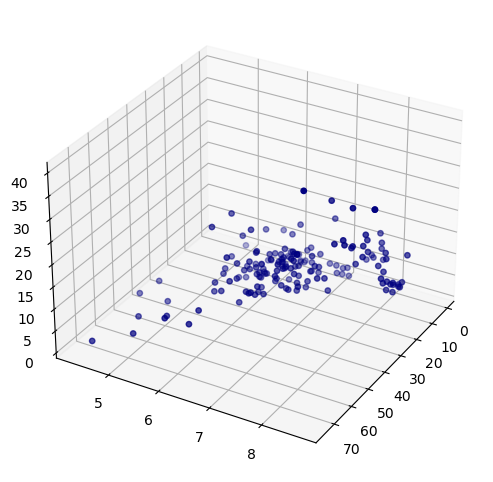

interactive(children=(IntSlider(value=30, description='elev', max=90, step=2), IntSlider(value=30, description…

In [62]:
feature_sets = [
    ['Clay'],
    ['Clay', 'Humus'],
    ['Clay', 'pH_eau'],
    ['Clay', 'Khf_IP'],
    ['Clay', 'pH_eau', 'Sand', 'Humus']
]

target = df['CEC']

test_errors_summary = []
train_errors_summary = []

for feature_set in feature_sets:
    x = df[feature_set].values
    
    best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol = stochastic_poly(df, feature_set, target, iters=100)
    print('best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set:', best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set)
    test_errors_summary.append(R2_test_pol)
    train_errors_summary.append(R2_train_pol)

bars_plot(feature_sets, test_errors_summary, train_errors_summary)

################## Puesta en marcha y plot #################

LinReg_CEC_TS = LinearRegression()
x = df[['Clay', 'pH_eau', 'Sand', 'Humus']]
poly = PolynomialFeatures(degree=2)
poly.fit(x)
xt = poly.transform(x)
LinReg_CEC_TS.fit(xt, target)
ypred = LinReg_CEC_TS.predict(xt)
R2 = r2_score(target, ypred)
RMSE_ = RMSE(target, ypred)
print('R2', R2)
print('RMSE', RMSE_)

# Create a meshgrid for Clay and Khf_IP
a3 = np.linspace(df.Clay.min(), df.Clay.max(), 50)
b3 = np.linspace(df.pH_eau.min(), df.pH_eau.max(), 50)
c3 = np.linspace(df.Sand.min(), df.Sand.max(), 50)
d3 = np.linspace(df.Humus.min(), df.Humus.max(), 50)

A3, B3, C3, D3 = np.meshgrid(a3, b3, c3, d3)

# Calculate the Z values for the plane using the meshgrid
Z3 = LinReg_CEC_TS.coef_[0]*LinReg_CEC_TS.intercept_ + LinReg_CEC_TS.coef_[1]*A3 + LinReg_CEC_TS.coef_[2]*B3 + LinReg_CEC_TS.coef_[3]*C3 + LinReg_CEC_TS.coef_[4]*D3 
+ LinReg_CEC_TS.coef_[5]*A3*A3 + LinReg_CEC_TS.coef_[6]*A3*B3 + LinReg_CEC_TS.coef_[7]*A3*C3 + LinReg_CEC_TS.coef_[8]*A3*D3 + LinReg_CEC_TS.coef_[9]*B3*B3 
+ LinReg_CEC_TS.coef_[10]*B3*C3 + LinReg_CEC_TS.coef_[11]*B3*D3 + LinReg_CEC_TS.coef_[12]*C3*C3 + LinReg_CEC_TS.coef_[13]*C3*D3 + LinReg_CEC_TS.coef_[14]*D3*D3

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Clay'], df['pH_eau'], df['CEC'], c="navy", s=15)
ax.view_init(elev=30, azim=30)
plt.show()

#def interactive_plot(elev=30, azim=30):
#    return plot_3d(df, 'Clay', 'pH_eau', 'CEC', A3, B3, Z3[0][1], elev, azim)

widgets.interactive(interactive_plot, elev=(0, 90, 2), azim=(0, 360, 2))
# De aca concluyo que el grado del polinomio puede mejorar el fitting, y que Khf_IP es tan efectivo como Humus para predecir CEC. Esperemos aun las muestras de Polonia.

best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set: 1 0.498 0.505 2.998 2.944 ['Humus']
best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set: 1 0.489 0.519 3.021 2.903 ['Khf_IP', 'Humus']
best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set: 2 0.156 0.314 3.904 3.471 ['Clay', 'pH_eau']
best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set: 2 0.048 0.352 3.996 3.371 ['Clay', 'Khf_IP']
best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set: 2 0.589 0.634 2.7 2.527 ['Clay', 'Humus']
best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set: 1 0.529 0.573 2.886 2.731 ['Clay', 'Humus', 'Khf_IP']
best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set: 1 0.676 0.719 2.367 2.206 ['Clay', 'pH_eau', 'Sand', 'Humus']


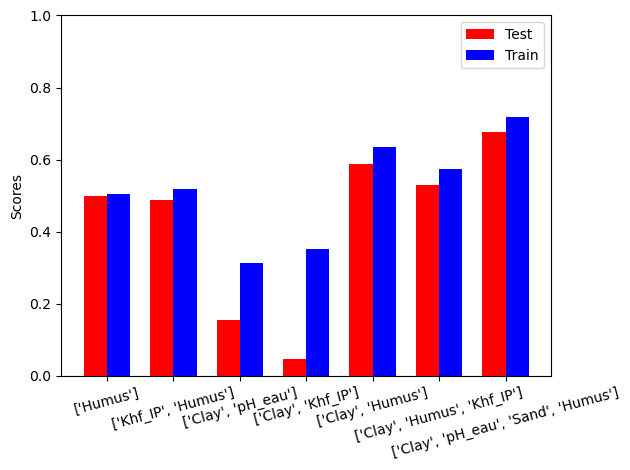

R2 0.8017006558270277
RMSE 1.8922628311571266


<Figure size 640x480 with 0 Axes>

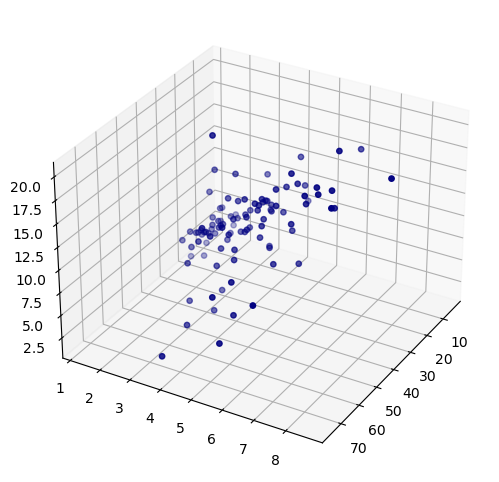

interactive(children=(IntSlider(value=30, description='elev', max=90, step=2), IntSlider(value=30, description…

In [63]:
feature_sets = [
    ['Humus'],
    ['Khf_IP', 'Humus'],
    ['Clay', 'pH_eau'],
    ['Clay', 'Khf_IP'],
    ['Clay', 'Humus'],
    ['Clay', 'Humus', 'Khf_IP'],
    ['Clay', 'pH_eau', 'Sand', 'Humus']
]

df_trop = df[69:]
target = df_trop['CEC']

test_errors_summary = []
train_errors_summary = []

for feature_set in feature_sets:
    x = df_trop[feature_set].values
    
    best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol = stochastic_poly(df_trop, feature_set, target, iters=100)
    print('best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set:', best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set)
    test_errors_summary.append(R2_test_pol)
    train_errors_summary.append(R2_train_pol)

bars_plot(feature_sets, test_errors_summary, train_errors_summary)

################## Puesta en marcha y plot #################

LinReg_CEC_TS = LinearRegression()
x = df_trop[['Clay', 'pH_eau', 'Sand', 'Humus']]
poly = PolynomialFeatures(degree=2)
poly.fit(x)
xt = poly.transform(x)
LinReg_CEC_TS.fit(xt, target)
ypred = LinReg_CEC_TS.predict(xt)
R2 = r2_score(target, ypred)
RMSE_ = RMSE(target, ypred)
print('R2', R2)
print('RMSE', RMSE_)

# Create a meshgrid for Clay and Khf_IP
a3 = np.linspace(df_trop.Clay.min(), df_trop.Clay.max(), 50)
b3 = np.linspace(df_trop.pH_eau.min(), df_trop.pH_eau.max(), 50)
c3 = np.linspace(df_trop.Sand.min(), df_trop.Sand.max(), 50)
d3 = np.linspace(df_trop.Humus.min(), df_trop.Humus.max(), 50)

A3, B3, C3, D3 = np.meshgrid(a3, b3, c3, d3)

# Calculate the Z values for the plane using the meshgrid
Z3 = LinReg_CEC_TS.coef_[0]*LinReg_CEC_TS.intercept_ + LinReg_CEC_TS.coef_[1]*A3 + LinReg_CEC_TS.coef_[2]*B3 + LinReg_CEC_TS.coef_[3]*C3 + LinReg_CEC_TS.coef_[4]*D3 
+ LinReg_CEC_TS.coef_[5]*A3*A3 + LinReg_CEC_TS.coef_[6]*A3*B3 + LinReg_CEC_TS.coef_[7]*A3*C3 + LinReg_CEC_TS.coef_[8]*A3*D3 + LinReg_CEC_TS.coef_[9]*B3*B3 
+ LinReg_CEC_TS.coef_[10]*B3*C3 + LinReg_CEC_TS.coef_[11]*B3*D3 + LinReg_CEC_TS.coef_[12]*C3*C3 + LinReg_CEC_TS.coef_[13]*C3*D3 + LinReg_CEC_TS.coef_[14]*D3*D3

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_trop['Clay'], df_trop['Humus'], df_trop['CEC'], c="navy", s=15)
ax.view_init(elev=30, azim=30)
plt.show()

#def interactive_plot(elev=30, azim=30):
#    return plot_3d(df, 'Clay', 'pH_eau', 'CEC', A3, B3, Z3[0][1], elev, azim)

widgets.interactive(interactive_plot, elev=(0, 90, 2), azim=(0, 360, 2))
# De aca concluyo que el grado del polinomio puede mejorar el fitting, y que Khf_IP es tan efectivo como Humus para predecir CEC. Esperemos aun las muestras de Polonia.

## Khf_IP prediction for non-tropical soils

feature_set, best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol: ['Clay'] 0 -0.159 0.0 0.001 0.001
feature_set, best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol: ['Clay', 'Humus'] 0 -0.159 0.0 0.001 0.001
feature_set, best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol: ['Clay', 'pH_eau'] 1 -0.155 0.167 0.001 0.001
feature_set, best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol: ['Clay', 'CEC'] 3 0.124 0.689 0.001 0.001
feature_set, best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol: ['Clay', 'pH_eau', 'Sand', 'Humus'] 2 0.146 0.835 0.001 0.0


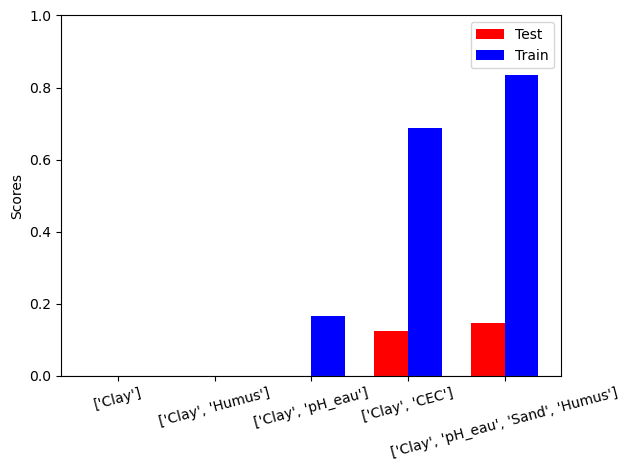

R2 0.6651475990040276
RMSE 0.0006458790392975342
xt[0] [1.00e+00 2.17e+01 1.39e+01 4.72e+02 3.01e+02 1.92e+02 1.03e+04 6.54e+03
 4.17e+03 2.66e+03]
LinReg_Khf_NTS [ 0.00e+00 -1.71e-04  3.74e-04  2.54e-05 -7.58e-05  5.35e-05  1.26e-07
 -1.99e-06  5.06e-06 -3.53e-06]


<Figure size 640x480 with 0 Axes>

interactive(children=(IntSlider(value=30, description='elev', max=90, step=5), IntSlider(value=30, description…

In [64]:
feature_sets = [
    ['Clay'],
    ['Clay', 'Humus'],
    ['Clay', 'pH_eau'],
    ['Clay', 'CEC'],
    ['Clay', 'pH_eau', 'Sand', 'Humus']
]

target = df_fil['Khf_IP']

test_errors_summary = []
train_errors_summary = []

for feature_set in feature_sets:
    x = df_fil[feature_set].values
    
    best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol = stochastic_poly(df_fil, feature_set, target, iters=100)
    print('feature_set, best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol:', feature_set, best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol)
    test_errors_summary.append(R2_test_pol)
    train_errors_summary.append(R2_train_pol)

bars_plot(feature_sets, test_errors_summary, train_errors_summary)

################## Puesta en marcha y plot #################

LinReg_Khf_NTS = LinearRegression()
x = df_fil[['Clay', 'CEC']]
poly = PolynomialFeatures(degree=3)
poly.fit(x)
xt = poly.transform(x)
LinReg_Khf_NTS.fit(xt, target)
ypred = LinReg_Khf_NTS.predict(xt)
R2 = r2_score(target, ypred)
RMSE_ = RMSE(target, ypred)
print('R2', R2)
print('RMSE', RMSE_)
print('xt[0]', xt[0])
# Create a meshgrid for Clay and Khf_IP
a4 = np.linspace(df_fil.Clay.min(), df_fil.Clay.max(), 50)
b4 = np.linspace(df_fil.CEC.min(), df_fil.CEC.max(), 50)
A4, B4 = np.meshgrid(a4, b4)

print('LinReg_Khf_NTS', LinReg_Khf_NTS.coef_)
# Calculate the Z values for the plane using the meshgrid
zz = LinReg_Khf_NTS.coef_[0]*LinReg_Khf_NTS.intercept_ + LinReg_Khf_NTS.coef_[1]*A4 + LinReg_Khf_NTS.coef_[2]*B4 

def interactive_plot(elev=30, azim=30):
    return plot_3d(df_fil, xx, yy, zz, elev, azim)

widgets.interactive(interactive_plot, elev=(0, 90, 5), azim=(0, 360, 5))

## Khf_IP prediction for tropical and non-tropical soils

best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set: 1 0.251 0.336 0.003 0.003 ['Clay']
best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set: 1 0.329 0.429 0.003 0.003 ['Clay', 'Humus']
best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set: 1 0.256 0.355 0.003 0.003 ['Clay', 'pH_eau']
best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set: 2 0.301 0.538 0.003 0.002 ['Clay', 'CEC']
best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set: 1 0.349 0.459 0.003 0.003 ['Clay', 'pH_eau', 'Sand', 'Humus']


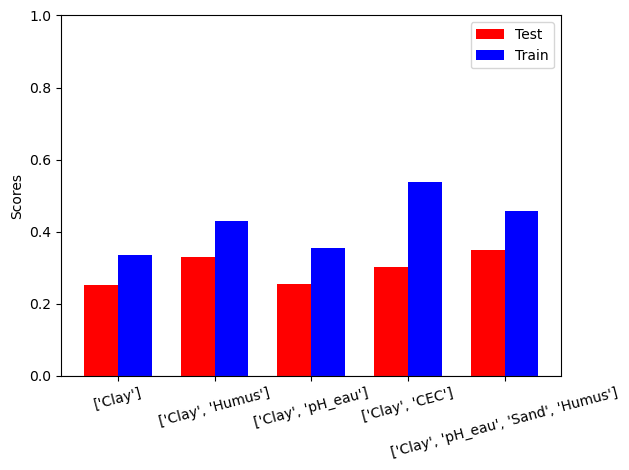

R2 0.44931012601246045
RMSE 0.002677200923046284
LinReg_Khf_TS [ 0.00e+00  1.22e-04 -2.15e-04  2.89e-05  6.34e-04]


<Figure size 640x480 with 0 Axes>

interactive(children=(IntSlider(value=30, description='elev', max=90, step=5), IntSlider(value=30, description…

In [66]:
feature_sets = [
    ['Clay'],
    ['Clay', 'Humus'],
    ['Clay', 'pH_eau'],
    ['Clay', 'CEC'],
    ['Clay', 'pH_eau', 'Sand', 'Humus']
]

target = df['Khf_IP']

test_errors_summary = []
train_errors_summary = []

for feature_set in feature_sets:
    x = df[feature_set].values
    
    best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol = stochastic_poly(df, feature_set, target, iters=100)
    print('best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set:', best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set)
    test_errors_summary.append(R2_test_pol)
    train_errors_summary.append(R2_train_pol)

bars_plot(feature_sets, test_errors_summary, train_errors_summary)

################## Puesta en marcha y plot #################

LinReg_Khf_TS = LinearRegression()
x = df[['Clay', 'pH_eau', 'Sand', 'Humus']]
poly = PolynomialFeatures(degree=1)
poly.fit(x)
xt = poly.transform(x)
LinReg_Khf_TS.fit(xt, target)
ypred = LinReg_Khf_TS.predict(xt)
R2 = r2_score(target, ypred)
RMSE_ = RMSE(target, ypred)
print('R2', R2)
print('RMSE', RMSE_)

# Create a meshgrid for Clay and Khf_IP
x_ = np.linspace(df.Clay.min(), df.Clay.max(), 50)
y_ = np.linspace(df.Humus.min(), df.Humus.max(), 50)
xx, yy = np.meshgrid(x_, y_)

print('LinReg_Khf_TS', LinReg_Khf_TS.coef_)
# Calculate the Z values for the plane using the meshgrid
zz = LinReg_Khf_TS.coef_[0]*xx + LinReg_Khf_TS.coef_[1]*yy + LinReg_Khf_TS.intercept_

def interactive_plot(elev=30, azim=30):
    return plot_3d(df, xx, yy, zz, elev, azim)

widgets.interactive(interactive_plot, elev=(0, 90, 5), azim=(0, 360, 5))